<a href="https://colab.research.google.com/github/aravindh698/rep2/blob/master/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Nifty50.csv")
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [0]:

#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2

#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()

#create two new DataFrame columns to hold values of upper and lower Bollinger bands
df['Rolling Mean'] = rolling_mean
df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)


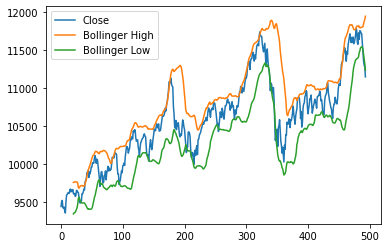

In [4]:
df[['Close','Bollinger High','Bollinger Low']].plot()


In [0]:
df.fillna(0,inplace=True)

In [6]:
criteria = [df['Close'] < df['Bollinger Low'],df['Close'].between(df['Bollinger Low'],df['Rolling Mean']),df['Close'].between(df['Rolling Mean'],df['Bollinger High']),df['Close'] > df['Bollinger High']]
values = ['Buy','Hold Buy','Hold Sort','Short']
df['Call'] = np.select(criteria, values, 0)
df.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Rolling Mean,Bollinger High,Bollinger Low,Call
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,11657.780952,11807.965790,11507.596115,Buy
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,11644.233333,11843.096699,11445.369967,Buy
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,11630.128571,11878.595240,11381.661902,Buy
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,11611.697619,11902.772545,11320.622693,Buy
493,13-May-2019,11258.70,11300.20,11125.60,11148.20,357586433,16722.91,11589.969048,11944.507213,11235.430883,Buy


In [7]:
from sklearn.model_selection import train_test_split
X=df[['Close','Rolling Mean','Bollinger High','Bollinger Low']]
y=df['Call']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeClassifier
classsi=DecisionTreeClassifier(criterion='entropy')
classsi.fit(X_train,y_train)
classsi_pred=classsi.predict(X_test)
print(classsi_pred)

['Hold Buy' 'Hold Buy' 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Short'
 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Hold Sort' 'Hold Buy'
 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Buy'
 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Buy' 'Hold Sort'
 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Hold Sort' 'Hold Buy'
 'Buy' 'Hold Buy' 'Buy' 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Hold Sort'
 'Hold Buy' 'Hold Sort' 'Hold Buy' 'Hold Sort' 'Hold Sort' 'Short'
 'Hold Sort' 'Hold Sort' 'Short' 'Hold Sort' 'Hold Sort' 'Hold Sort'
 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Hold Sort' 'Hold Sort' 'Hold Sort'
 'Short' 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Short' 'Buy' 'Hold Buy'
 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Hold Sort' 'Short' 'Hold Buy'
 'Hold Sort' 'Hold Sort' 'Hold Buy' 'Hold Sort' 'Hold Sort' 'Hold Sort'
 'Hold Sort' 'Hold Sort' 'Buy' 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Short'
 'Hold Buy' 'Hold Buy' 'Hold Sort' 'Hold Sort' 'Hold Sort' 'Hold Sort'
 'Short' 'Hold Sort' 'Hol

In [10]:
df['per']=((df['Close']-df['Open'])/df['Open'])*100
df['per1']=((df['High']-df['Low'])/df['Low'])*100
df['mean1']=df['Close'].rolling(window=5).mean()
df['std1']=df['Close'].rolling(window=5).std()
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Rolling Mean,Bollinger High,Bollinger Low,Call,per,per1,mean1,std1
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.0,0.0,0.0,Short,0.125615,0.277510,NaN,NaN
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.0,0.0,0.0,Short,0.541697,0.643483,NaN,NaN
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.0,0.0,0.0,Short,0.085631,0.490191,NaN,NaN
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,0.0,0.0,0.0,Short,-0.251238,0.753868,NaN,NaN
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,0.0,0.0,0.0,Short,-0.443510,1.224609,9468.15,47.164301


In [14]:
    df['Action']=None
    for row in range(len(df)):
    
        if (df['Close'].iloc[row] > df['Bollinger High'].iloc[row]) and (df['Close'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
            df['Action'].iloc[row] = -1
        
        if (df['Close'].iloc[row] < df['Bollinger Low'].iloc[row]) and (df['Close'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
            df['Action'].iloc[row] = 1
            
    df['Action'].fillna(method='ffill',inplace=True)
    df.head().fillna(0,inplace=True)
    


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [15]:
X=df[['per','per1','std1','mean1']]
y=df['Action']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestClassifier
classi=RandomForestClassifier()
classi.fit(X_train,y_train)
classi_pred=classi.predict(X_test)
score=classi.score(X_test,y_test)
print(score)


0.8181818181818182


In [37]:

df['pct']=df['Close'].pct_change()
wts=[0.1]
weighted_return=(wts*df['pct'])
port_ret = weighted_return.sum(axis=1)
cumulative_ret = (port_ret + 1).cumprod()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();



ValueError: ignored